## Session 3 Homework

### Dataset

In this homework, we will use the Bank Marketing dataset. 

Or you can do it with wget:
> wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

We need to take bank/bank-full.csv file from the downloaded zip-file.
In this dataset our desired target for classification task will be y variable - has the client subscribed a term deposit or not.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


### Features

For the rest of the homework, you'll need to use only these columns:

- age,
- job,
- marital,
- education,
- balance,
- housing,
- contact,
- day,
- month,
- duration,
- campaign,
- pdays,
- previous,
- poutcome,
- y

### Data preparation

- Select only the features from above.
- Check if the missing values are presented in the features.

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [7]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [8]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician
marital,married,single,married,married,single,married,single,divorced,married,single
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary
default,no,no,no,no,no,no,no,yes,no,no
balance,2143,29,2,1506,1,231,447,2,121,593
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes
loan,no,no,yes,no,no,no,yes,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5,5,5,5,5,5


In [9]:
data = data[features]
data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
data.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1
What is the most frequent observation (mode) for the column education?

In [12]:
education_mode = data['education'].mode()[0]
education_mode

'secondary'

In [13]:
data.describe(include=["O"])

,job,marital,education,housing,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,3,12,4,2
top,blue-collar,married,secondary,yes,cellular,may,unknown,no
freq,9732,27214,23202,25130,29285,13766,36959,39922


In [14]:
data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

The answer is ***secondary***

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

age and balance
day and campaign
day and pdays
pdays and previous

In [15]:
# convert yes to 1 and no to 0
data.y = (data.y == 'yes').astype(int)
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [16]:
data_numeric = data.copy()
data_numeric = data_numeric.drop(['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome',  'duration', 'y'], axis=1)
data_numeric.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [17]:
data_numeric.corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


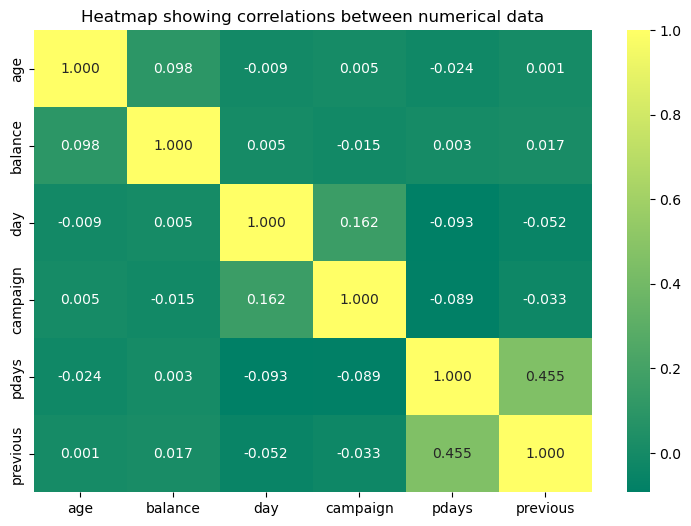

In [18]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [19]:
data_numeric.corr().unstack().sort_values(ascending = False)

age       age         1.000000
balance   balance     1.000000
pdays     pdays       1.000000
campaign  campaign    1.000000
day       day         1.000000
previous  previous    1.000000
          pdays       0.454820
pdays     previous    0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
previous  balance     0.016674
balance   previous    0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
age       previous    0.001288
previous  age         0.001288
day       age        -0.009120
age       day        -0.009120
campaign  balance    -0.014578
balance   campaign   -0.014578
pdays     age        -0.023758
age       pdays      -0.023758
campaign  previous   -0.032855
previous  campaign   -0.032855
          day        -0.051710
day       previous   -0.051710
campaign

Ignoring these trivial cases, the two features with the highest non-trivial correlation are:
> previous and pdays, with a correlation of 0.454820.

### Split the data

In [20]:
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [21]:
# data_class = data.copy()
# data_class = data_class.drop(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], axis=1)
# len(data_class)

In [22]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

In [23]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
df_test

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,blue-collar,married,secondary,580,yes,unknown,16,may,192,1,-1,0,unknown,0
1,47,services,single,secondary,3644,no,unknown,9,jun,83,2,-1,0,unknown,0
2,25,student,single,tertiary,538,yes,cellular,20,apr,226,1,-1,0,unknown,0
3,42,management,married,tertiary,1773,no,cellular,9,apr,311,1,336,1,failure,0
4,56,management,married,tertiary,217,no,cellular,21,jul,121,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,47,management,married,tertiary,1890,no,cellular,8,jul,161,1,-1,0,unknown,0
9039,32,blue-collar,single,secondary,217,yes,cellular,15,may,692,3,-1,0,unknown,1
9040,52,admin.,divorced,secondary,0,yes,unknown,26,may,206,1,-1,0,unknown,0
9041,40,admin.,divorced,secondary,783,yes,unknown,16,may,171,2,-1,0,unknown,0


In [26]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

### Question 3

- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2)

In [27]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.y)

In [28]:
categorical = ['contact', 'education', 'housing', 'poutcome']

In [29]:
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = round(df_mi.sort_values(ascending=False).to_frame(name='MI'), 2)
df_mi

,MI
poutcome,0.03
contact,0.01
housing,0.01
education,0.00


> The biggest mutual information score  is poutcome

In [30]:
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

# Question 4

In [31]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [32]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [33]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [34]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9


> The accuracy is 0.9

### Question 5

In [35]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [36]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [37]:
scores

,eliminated_feature,accuracy,difference
0,age,0.901017,-0.001017
1,job,0.901017,-0.001017
2,marital,0.900243,-0.000243
3,education,0.900796,-0.000796
4,balance,0.901460,-0.001460
5,housing,0.901017,-0.001017
6,contact,0.900354,-0.000354
7,day,0.901349,-0.001349
8,month,0.899801,0.000199
9,duration,0.889958,0.010042


In [38]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
4,balance,0.90146,-0.00146
11,pdays,0.90146,-0.00146


> The answer is balance

### Question 6

In [39]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [40]:
y_train.shape, y_val.shape

((27126,), (9042,))

In [51]:
scores = {}
C_values = [0.01, 0.1, 1, 10, 100]

for C in C_values:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=C, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores[C] = round(score, 3)
    print(f'C = {C}:\t score = {score}')

C = 0.01:	 score = 0.8910639239106393
C = 0.1:	 score = 0.8929440389294404
C = 1:	 score = 0.893718203937182
C = 10:	 score = 0.8939393939393939
C = 100:	 score = 0.8934970139349702


In [52]:
scores

{0.01: 0.891, 0.1: 0.893, 1: 0.894, 10: 0.894, 100: 0.893}

> The answer is 10